In [1]:
import pandas as pd
import numpy as np
#Allows you to use the plotting functions in the Matplotlib libraries (packages) 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Read in the data
#covidData = pd.read_csv("NamibiaCovidData_Jul_Aug_2021.csv")
excel_file = '2021_DSA_Cases.xlsx.xls'
data = pd.read_excel('2021_DSA_Cases.xlsx', sheet_name = ['Khomas', 'Ohangwena', 'Erongo', 'Omusati', 'Kunene', 'Oshana', 
                                                            'Kavango East', 'Oshikoto', 'Karas', 'Zambezi', 'Otjozondjupa',
                                                            'Kavango West', 'Hardap', 'Omaheke'])



In [3]:
df = pd.concat(data [frame] for frame in data.keys())
df

Date    Male  Female  New Cases   Active Cases  Recoveries  \
0   2021-01-01  286.0     NaN       256.0        3607.0       421.0   
1   2021-01-02   63.0    46.0         7.0        3507.0        56.0   
2   2021-01-03  208.0   254.0       117.0        3843.0        35.0   
3   2021-01-04  132.0   138.0        82.0        3998.0       104.0   
4   2021-01-05  235.0   266.0       153.0        3885.0       454.0   
..         ...    ...     ...         ...           ...         ...   
268 2021-09-26    NaN     NaN         NaN        1114.0         NaN   
269 2021-09-27    NaN     NaN         NaN        1199.0         NaN   
270 2021-09-28    NaN     NaN         NaN           NaN         NaN   
271 2021-09-29    NaN     NaN         NaN           NaN         NaN   
272 2021-09-30    NaN     NaN         NaN           NaN         NaN   

     Vacinated  School Infections  Deaths  Unnamed: 9  Unnamed: 10  
0          0.0                0.0     0.0         NaN          NaN  
1          0.0                0.0     4.0         NaN          NaN  
2          0.0                0.0     NaN         NaN          NaN  
3          0.0                0.0     NaN         NaN          NaN  
4          0.0                0.0     2.0         NaN          NaN  
..         ...                ...     ...         ...          ...  
268        NaN                NaN     NaN         NaN          NaN  
269        NaN                NaN     NaN         NaN          NaN  
270        NaN                NaN     NaN         NaN          NaN  
271        NaN                NaN     NaN         NaN          NaN  
272        NaN                NaN     NaN         NaN          NaN  

[3821 rows x 11 columns]

In [4]:
df.head()

Date    Male  Female  New Cases   Active Cases  Recoveries  Vacinated  \
0 2021-01-01  286.0     NaN       256.0        3607.0       421.0        0.0   
1 2021-01-02   63.0    46.0         7.0        3507.0        56.0        0.0   
2 2021-01-03  208.0   254.0       117.0        3843.0        35.0        0.0   
3 2021-01-04  132.0   138.0        82.0        3998.0       104.0        0.0   
4 2021-01-05  235.0   266.0       153.0        3885.0       454.0        0.0   

   School Infections  Deaths  Unnamed: 9  Unnamed: 10  
0                0.0     0.0         NaN          NaN  
1                0.0     4.0         NaN          NaN  
2                0.0     NaN         NaN          NaN  
3                0.0     NaN         NaN          NaN  
4                0.0     2.0         NaN          NaN

In [5]:
from dateutil.parser import parse
import datetime

dataD     = np.zeros(len(df["Date "]))
datesArr  = [] #np.zeros(len(data["Date "]))
x_axis    = np.zeros(len(df["Date "]))
arr_idx   = 0
    
for item in df["Date "]:
    #dt = parse(item, dayfirst=True)
    dt = item
    #date = datetime.datetime.strptime(item,"%d/%m/%Y")
    datesArr.insert(arr_idx, item) #[arr_idx] = item
    dataD[arr_idx] = dt.toordinal() #date.toordinal(dt)
    arr_idx = arr_idx +1
    
x_axis = dataD - dataD[0]
#print(x_axis)
tyd = x_axis
    
tydList = tyd.tolist() #A list to get the index

In [6]:
dt

Timestamp('2021-09-30 00:00:00')

In [7]:
df['Date ']

0     2021-01-01
1     2021-01-02
2     2021-01-03
3     2021-01-04
4     2021-01-05
         ...    
268   2021-09-26
269   2021-09-27
270   2021-09-28
271   2021-09-29
272   2021-09-30
Name: Date , Length: 3821, dtype: datetime64[ns]

In [8]:
len(datesArr)

3821

In [9]:
datesArr = [datesArr for datesArr in datesArr if datesArr != 'NaN' ]

In [ ]:
plt.rcParams["figure.figsize"] = [18, 15]
plt.rcParams["figure.autolayout"] = True

df.plot(x="Date ", y=["Active Cases"], style=['.--', '*--'])

plt.title("Daily tests conducted vs New infections for 27 June - 31 August 2021", fontsize=25)
plt.ylabel("Frequency", fontsize=25)
plt.xlabel("Dates", fontsize=25)
#plt.xticks(range(len(datesArr)), datesArr, fontsize=20, Rotation = 50)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 20})

plt.show()

In [11]:
df.columns

Index(['Date ', 'Male', 'Female', 'New Cases ', 'Active Cases', 'Recoveries',
       'Vacinated', 'School Infections', 'Deaths', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')

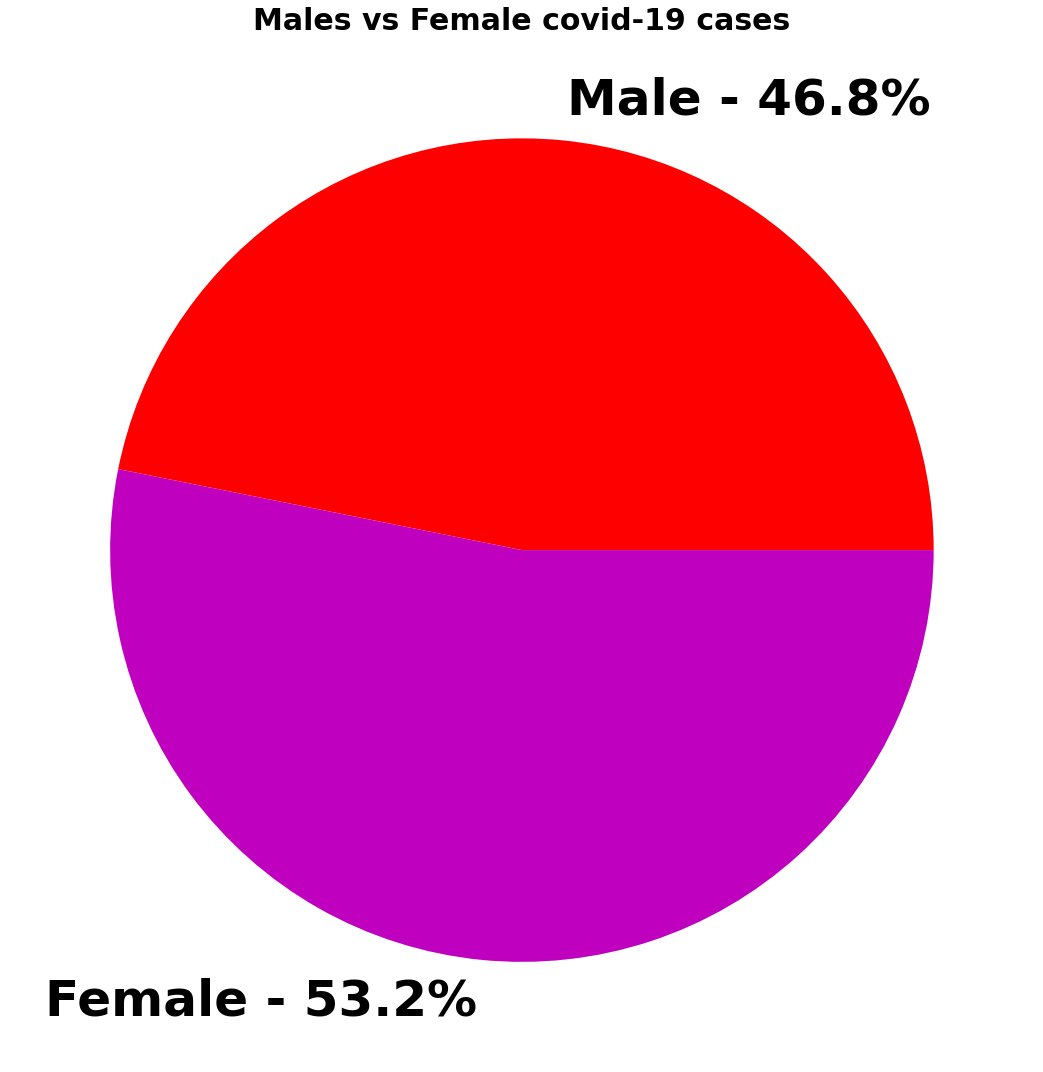

In [12]:
xVals = ["Male", "Female"]

yVals = df.loc[:,["Male", "Female"]].sum(axis=0)

porcent = 100.*yVals/yVals.sum()

explodeTuple = (0.0, 0.0)


#label = ['{0} - {1:1.1f}% ({2})'.format(i,j,k) for i,j,k in zip(xVals, porcent, yVals)]
label = ['{0} - {1:1.1f}%'.format(i,j,k) for i,j,k in zip(xVals, porcent, yVals)]
patches, texts = plt.pie(yVals, colors=['r', 'm'], labels=label, explode=explodeTuple)


plt.setp(texts, size=50, weight="bold")
plt.title("Males vs Female covid-19 cases", fontsize=30, weight="bold")


plt.show()

In [14]:
list = ["Date"]
len("Date")

4

Creating my dashboard

In [15]:
import dash
# html is used to set up the layout, and dcc is used to embed the graphs to the dashboard:
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [16]:
xVals = ["Male", "Female"]

yVals = df.loc[:,["Male", "Female"]].sum(axis=0)

porcent = 100.*yVals/yVals.sum()
explodeTuple = (0.0, 0.0)

label = ['{0} - {1:1.1f}% ({2})'.format(i,j,k) for i,j,k in zip(xVals, porcent, yVals)]
chart1 = px.pie(df, yVals, labels=label,
                title='Males vs Female covid-19 cases', height = 500)

chart1.update(layout=dict(title=dict(x=0.5)))

In [36]:
chart2 = px.bar(df, x="Date ", y="New Cases ", title='Daily new cases for 2021')
chart2.update(layout=dict(title=dict(x=0.5)))

In [34]:
chart3 = px.area(df,x= "Date ", y=["School Infections"], title='School infections in 2021')
chart3.update(layout=dict(title=dict(x=0.5)))

In [33]:
chart4 = px.histogram(df,x= "Date ", y=["Active Cases"], title='Active cases in the year 2021')
chart4.update(layout=dict(title=dict(x=0.5)))

In [20]:
# Setup the style from the link:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# Embed the style to the dashabord:
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [25]:
graph1 = dcc.Graph(
        id='graph1',
        figure=chart1,
        className="four columns" 
    )
graph2 = dcc.Graph(
        id='graph2',
        figure=chart2,
        className="four columns"
    )
graph3 = dcc.Graph(
        id='graph3',
        figure=chart3,
        className="four columns" 
    )
graph4 = dcc.Graph(
        id='graph4',
        figure=chart4,
        className="four columns"
   )

In [37]:
# setup the header
header = html.H2(children="COVID-19 data analysis for the year 2021 in Namibia")
# setup to rows, graph 1-4 in the first row, and graph4 in the second:
row1 = html.Div(children=[graph1],)
row2 = html.Div(children=[graph2],)
row3 = html.Div(children=[graph3],)
row4 = html.Div(children=[graph4])

# setup & apply the layout
layout = html.Div(children=[header, row1, row2, row3, row4], style={"text-align": "center"})
app.layout = layout

In [ ]:
if __name__ == "__main__":
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Oct/2021 17:30:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2021 17:30:40] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2021 17:30:41] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2021 17:40:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2021 17:40:53] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Oct/2021 17:40:53] "GET /_dash-layout HTTP/1.1" 200 -
